In [4]:
#Import Libraries 
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklego.linear_model import LADRegression
from sklearn.linear_model import  Ridge, Lasso
from sklearn.model_selection import cross_val_score, cross_validate


pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 500
pd.options.display.max_rows = 100

In [5]:
#Import data
spotify_data = pd.read_csv("spotify_dataset.csv")

#print out column name: 
spotify_data.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

Cleaning Data

In [6]:
# Examine the first 10 rows
spotify_data.head(10)

Unnamed: 0                track_id                               artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV                           Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A                          Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b                Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx                          Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K                      Chord Overstreet   
5           5  01MVOl9KtVTNfFiBU9I7dc                          Tyrone Wells   
6           6  6Vc5wAMmXdKIAM7WUoEb7N  A Great Big World;Christina Aguilera   
7           7  1EzrEOXmMH3G43AXT1y7pA                            Jason Mraz   
8           8  0IktbUcnAGrvD03AWnz3Q8             Jason Mraz;Colbie Caillat   
9           9  7k9GuJYLp2AzqokyEdwEw2                        Ross Copperman   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Soundtrack)   
4                                                 Hold On   
5                                    Days I Will Remember   
6                             Is There Anybody Out There?   
7                     We Sing. We Dance. We Steal Things.   
8                     We Sing. We Dance. We Steal Things.   
9                                                  Hunger   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   
5        Days I Will Remember          58       214240     False   
6               Say Something          74       229400     False   
7                   I'm Yours          80       242946     False   
8                       Lucky          74       189613     False   
9                      Hunger          56       205594     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   
5         0.688  0.4810    6    -8.807     1       0.1050        0.2890   
6         0.407  0.1470    2    -8.822     1       0.0355        0.8570   
7         0.703  0.4440   11    -9.331     1       0.0417        0.5590   
8         0.625  0.4140    0    -8.700     1       0.0369        0.2940   
9         0.442  0.6320    1    -6.770     1       0.0295        0.4260   

   instrumentalness  liveness  valence    tempo  time_signature track_genre  
0          0.000001    0.3580   0.7150   87.917               4    acoustic  
1          0.000006    0.1010   0.2670   77.489               4    acoustic  
2          0.000000    0.1170   0.1200   76.332               4    acoustic  
3          0.000071    0.1320   0.1430  181.740               3    acoustic  
4          0.000000    0.0829   0.1670  119.949               4    acoustic  
5          0.000000    0.1890   0.6660   98.017               4    acoustic  
6          0.000003    0.0913   0.0765  141.284               3    acoustic  
7          0.000000    0.0973   0.7120  150.960               4    acoustic  
8          0.000000    0.1510   0.6690  130.088               4    acoustic  
9          0.004190    0.0735   0.1960   78.899               4    acoustic

In [7]:
#Examine the first 10 random rows
spotify_data.sample(10)

Unnamed: 0                track_id                      artists  \
4419         4419  69T4iEoAPo1MZ2tv8ppUCW   You'll Never Get to Heaven   
93373       93373  6x5sUSnjTj5pqOMEMbIhj8            Алёша Димитриевич   
93606       93606  39l8pwW6kquVEjtsIU0t8X             Николай Тимченко   
92857       92857  4xHXqIwdjXRYJvwT8HNByt  Cliff Richard & The Shadows   
72969       72969  4iLRsbijzBUP9AkQVlEn6z            We Came As Romans   
59503       59503  6Qlc9VW8bSgp6GMW8mnFPR     Saeed Dehghan;Ash Koosha   
57835       57835  1RpHpxwYfo8WdWwvEQ5GH7                Maisie Peters   
23888       23888  26VPU8yYHcZs2II1PD0G9g              Huxley;SHE KORO   
64634       64634  0b3y0JuA98NQ2Z0WlC3hPW                    Peggy Lee   
64087       64087  6JcWanfC5bkTQy4iXbeFKL                  Norah Jones   

                                          album_name  \
4419                                          Images   
93373  Шедевры русской эстрады. Мама, я жулика люблю   
93606         Военно-патриотическая музыка. Выпуск 2   
92857                               40 Golden Greats   
72969                                  Cold Like War   
59503                                          Oryan   
57835                         Good Enough - Easy Pop   
23888              Voltaire Music Pres. V - Issue 46   
64634                          Weihnachtslieder 2022   
64087                     Alternative Christmas 2022   

                        track_name  popularity  duration_ms  explicit  \
4419             Exquisite Tension          53       248295     False   
93373  Я милого узнаю по походочке           0       162186     False   
93606                   В землянке           1       186733     False   
92857                   Lucky Lips          36       163840     False   
72969                Cold Like War          55       226200     False   
59503           Khorshide Masnooyi           3       181818     False   
57835                  Good Enough           0       221377     False   
23888             Halo - Vocal Mix           0       395487     False   
64634                Happy Holiday           0       115506     False   
64087         I Dream Of Christmas           0       203906     False   

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
4419          0.705   0.275    3    -8.894     1       0.0264      0.843000   
93373         0.484   0.391    7   -14.147     1       0.1230      0.920000   
93606         0.225   0.256    7   -14.576     0       0.0570      0.958000   
92857         0.686   0.481    4   -12.250     1       0.0450      0.793000   
72969         0.458   0.961    5    -4.315     0       0.0798      0.000153   
59503         0.305   0.630    7   -11.688     0       0.0586      0.056200   
57835         0.587   0.319    5    -7.479     1       0.0517      0.816000   
23888         0.780   0.788    1    -7.476     1       0.0661      0.003320   
64634         0.369   0.499    6    -9.301     1       0.0448      0.829000   
64087         0.614   0.699    6    -6.238     1       0.0315      0.140000   

       instrumentalness  liveness  valence    tempo  time_signature  \
4419           0.604000     0.100    0.139  132.000               4   
93373          0.006730     0.203    0.577  181.397               4   
93606          0.000001     0.157    0.298   87.405               4   
92857          0.000000     0.216    0.902  144.862               4   
72969          0.001810     0.185    0.500  149.967               4   
59503          0.575000     0.185    0.273   66.161               4   
57835          0.000000     0.101    0.260   75.279               4   
23888          0.086500     0.101    0.289  124.005               4   
64634          0.000002     0.154    0.690  192.760               3   
64087          0.252000     0.115    0.431  107.552               4   

      track_genre  
4419      ambient  
93373     romance  
93606     romance  
92857  rockabilly  
72969   metalcore  

Cleaning Data:
- Remove repeated track_id
- Check for missing values (and imputation if necessary)
- invalid values - see column definitions

In [8]:
# Count occurrences of each track id
track_id_count = spotify_data['track_id'].value_counts().reset_index()

# Rename columns for clarity
track_id_count.columns = ['track_id', 'count']

track_id_count

track_id  count
0      6S3JlDAGk3uu3NtZbPnuhS      9
1      2kkvB3RNRzwjFdGhaUA0tz      8
2      2Ey6v4Sekh3Z0RUSISRosD      8
3      08kTa3SL9sV6Iy8KLKtGql      7
4      6bzWr3EpSEolVwlbLk58il      7
...                       ...    ...
89736  1s4YQ8NGWahmewapzQz83s      1
89737  2SxRPSQg90BMbSIMtCDVc4      1
89738  4DrOtvGcJRQ71S0TPwGMHW      1
89739  42bdU7oDyRvyRXaKbUrtfu      1
89740  3zqFsowz5iGbYIxZW5KlKw      1

[89741 rows x 2 columns]

In [9]:
# Remove duplicates and keep only one random copy
spotify_data_unique = spotify_data.drop_duplicates(subset='track_id', keep='first')

# If you want to keep a random copy, you can shuffle first
spotify_data_unique = spotify_data_unique.sample(frac=1).drop_duplicates(subset='track_id')

# Count occurrences of each track id
track_id_count = spotify_data_unique['track_id'].value_counts().reset_index()

# Rename columns for clarity
track_id_count.columns = ['track_id', 'count']

track_id_count

track_id  count
0      04YU3IbNPCd3VPHOHjJJUx      1
1      4Q7lXTzCcsDd6VkM9eXEwC      1
2      0vryyKyxCFXT0gg670yNEw      1
3      3WjNhFQ9TMdZ12QJRlJ8jV      1
4      7mMebrxjiIPhUlPyXQ4GTS      1
...                       ...    ...
89736  3JIKbZm4XjwM2BcuK5pSHw      1
89737  0dY1cTuq44STBXfrXbKlA7      1
89738  2Oghfvs0YkMNadU5c31GpJ      1
89739  6iC7vapdKp0XlKhxOkp8QJ      1
89740  0KQ1LhU7vGiXqn7eAw1nfl      1

[89741 rows x 2 columns]

Valid Range for each predictor variable:

popularity: 0 - 100

duration_ms: >0 

danceability: 0 - 1

energy: 0 - 1 

key: 0 - 11 

loudness: -49.53 - 4.53 

mode: 0 or 1 (check if any values not 0 or 1)

speechiness: 0 - 1

acousticness: 0 - 1 

instrumentalness: 0 - 1

liveness: 0 - 1

valence: 0 - 1 

tempo: 0 - 243 

time_signature: 3 - 7 (bad; the minumum is less than 3)

In [10]:
#Check summaries of each row
spotify_data_unique.select_dtypes('number').describe()

Unnamed: 0    popularity   duration_ms  danceability        energy  \
count   89741.000000  89741.000000  8.974100e+04  89741.000000  89741.000000   
mean    53479.144148     33.198438  2.291418e+05      0.562166      0.634458   
std     33409.981502     20.580824  1.129477e+05      0.176691      0.256605   
min         0.000000      0.000000  0.000000e+00      0.000000      0.000000   
25%     23767.000000     19.000000  1.730400e+05      0.450000      0.457000   
50%     50681.000000     33.000000  2.132930e+05      0.576000      0.676000   
75%     80618.000000     49.000000  2.642930e+05      0.692000      0.853000   
max    113999.000000    100.000000  5.237295e+06      0.985000      1.000000   

                key      loudness          mode   speechiness  acousticness  \
count  89741.000000  89741.000000  89741.000000  89741.000000  89741.000000   
mean       5.283549     -8.499004      0.636966      0.087442      0.328289   
std        3.559897      5.221490      0.480877      0.113277      0.338321   
min        0.000000    -49.531000      0.000000      0.000000      0.000000   
25%        2.000000    -10.322000      0.000000      0.036000      0.017100   
50%        5.000000     -7.185000      1.000000      0.048900      0.188000   
75%        8.000000     -5.108000      1.000000      0.085900      0.625000   
max       11.000000      4.532000      1.000000      0.965000      0.996000   

       instrumentalness      liveness       valence         tempo  \
count      89741.000000  89741.000000  89741.000000  89741.000000   
mean           0.173413      0.216970      0.469477    122.058316   
std            0.323848      0.194884      0.262864     30.117532   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.098200      0.249000     99.264000   
50%            0.000058      0.132000      0.457000    122.013000   
75%            0.097600      0.279000      0.682000    140.077000   
max            1.000000      1.000000      0.995000    243.372000   

       time_signature  
count    89741.000000  
mean         3.897427  
std          0.453435  
min          0.000000  
25%          4.000000  
50%          4.000000  
75%          4.000000  
max          5.000000

In [11]:
# 1136 rows (~1%) with invalid time signatures.
# Removing these rows will not significantly impact the size of our data. However, since their other fields are useful, we keep original.
rows_invalid_time_sig = spotify_data_unique[spotify_data_unique['time_signature'] < 3]
pct_invalid_time_sig = len(rows_invalid_time_sig)/len(spotify_data_unique.index)
valid_spotify_data = spotify_data_unique[spotify_data_unique['time_signature'] >= 3]
print ("Percent of invalid time sig: " + str(pct_invalid_time_sig))

# 1136 rows (~1%) with invalid tempo value.
# Removing these rows will not significantly impact the size of our data. However, since their other fields are useful, we keep original.
rows_invalid_tempo = spotify_data_unique[(spotify_data_unique['tempo'] > 243)]
pct_invalid_tempo = len(rows_invalid_tempo) / len(spotify_data_unique) * 100
valid_spotify_data = spotify_data_unique[(spotify_data_unique['tempo'] <= 243)]
print ("Percent of invalid popularity: " + str(pct_invalid_tempo))

Percent of invalid time sig: 0.011232324132782117
Percent of invalid popularity: 0.0011143178703156864


In [12]:
#Check summaries of each row
valid_spotify_data.select_dtypes('number').describe()

Unnamed: 0    popularity   duration_ms  danceability        energy  \
count   89740.000000  89740.000000  8.974000e+04  89740.000000  89740.000000   
mean    53479.644038     33.198150  2.291427e+05      0.562167      0.634463   
std     33409.832040     20.580758  1.129480e+05      0.176692      0.256602   
min         0.000000      0.000000  0.000000e+00      0.000000      0.000000   
25%     23767.750000     19.000000  1.730400e+05      0.450000      0.457000   
50%     50681.500000     33.000000  2.132955e+05      0.576000      0.676000   
75%     80618.500000     49.000000  2.642930e+05      0.692000      0.853000   
max    113999.000000    100.000000  5.237295e+06      0.985000      1.000000   

                key      loudness          mode   speechiness  acousticness  \
count  89740.000000  89740.000000  89740.000000  89740.000000  89740.000000   
mean       5.283597     -8.498895      0.636973      0.087442      0.328290   
std        3.559888      5.221416      0.480875      0.113278      0.338322   
min        0.000000    -49.531000      0.000000      0.000000      0.000000   
25%        2.000000    -10.322000      0.000000      0.036000      0.017100   
50%        5.000000     -7.185000      1.000000      0.048900      0.188000   
75%        8.000000     -5.108000      1.000000      0.085900      0.625000   
max       11.000000      4.532000      1.000000      0.965000      0.996000   

       instrumentalness      liveness       valence         tempo  \
count      89740.000000  89740.000000  89740.000000  89740.000000   
mean           0.173408      0.216971      0.469476    122.056964   
std            0.323846      0.194885      0.262865     30.114977   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.098200      0.249000     99.262750   
50%            0.000058      0.132000      0.457000    122.013000   
75%            0.097600      0.279000      0.682000    140.077000   
max            1.000000      1.000000      0.995000    222.605000   

       time_signature  
count    89740.000000  
mean         3.897437  
std          0.453427  
min          0.000000  
25%          4.000000  
50%          4.000000  
75%          4.000000  
max          5.000000

In [13]:
#Calculate the percent of missingness of each variable in the data
missing_prop = (valid_spotify_data.isna().sum()/len(valid_spotify_data.index))*100
print(missing_prop.sort_values())

Unnamed: 0          0.000000
track_id            0.000000
duration_ms         0.000000
popularity          0.000000
explicit            0.000000
key                 0.000000
energy              0.000000
danceability        0.000000
mode                0.000000
speechiness         0.000000
acousticness        0.000000
loudness            0.000000
instrumentalness    0.000000
tempo               0.000000
valence             0.000000
liveness            0.000000
track_genre         0.000000
time_signature      0.000000
track_name          0.001114
artists             0.001114
album_name          0.001114
dtype: float64


In [14]:
# Print rows where track_name is missing
missing_track_name = valid_spotify_data[valid_spotify_data['track_name'].isna()]
print(missing_track_name)

       Unnamed: 0                track_id artists album_name track_name  \
65900       65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN   

       popularity  duration_ms  explicit  danceability  energy  key  loudness  \
65900           0            0     False         0.501   0.583    7     -9.46   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
65900     0       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature track_genre  
65900  138.391               4       k-pop  


There is only 1 missing track_name, so we will just remove it

In [15]:
# Remove rows where any value is missing
spotify_data_cleaned = valid_spotify_data.dropna()

# Verify the rows with missing values have been removed
spotify_data_cleaned

Unnamed: 0                track_id                artists  \
36408        36408  4Q7lXTzCcsDd6VkM9eXEwC            Dizaro;WLZN   
13006        13006  0vryyKyxCFXT0gg670yNEw       Frankie Knuckles   
112163      112163  3WjNhFQ9TMdZ12QJRlJ8jV                   No.1   
10536        10536  7mMebrxjiIPhUlPyXQ4GTS            The Prodigy   
66112        66112  2mIfukfnSxDiMbh9xOxeZN               Pj Panda   
...            ...                     ...                    ...   
36437        36437  1cVRg5ip6EAu1hJ99zZpW6              Ben Mazué   
76603        76603  1EGPPReB4V4Nt4xTCyrsRj         Andrea Bocelli   
17378        17378  5qWoMjTxPfhUNDdQMF6hMF                 3FORCE   
101832      101832  61pIy97Qal5Re63soqLGoq  Ocean Waves For Sleep   
61593        61593  04YU3IbNPCd3VPHOHjJJUx              Last Idol   

                            album_name                    track_name  \
36408                         Evermore                      Evermore   
13006   Baby Wants to Ride / Your Love                     Your Love   
112163                  İyilik Meleğim                İyilik Meleğim   
10536                     Out of Space  Music Reach (1,2,3,4) - Live   
66112   The New Nursery Rhymes, Vol. 1       Baby Shark (Trap Remix)   
...                                ...                           ...   
36437                        Ben Mazué               L'homme modeste   
76603                            Sogno              Come un fiume tu   
17378                        Crossfire  In the House, In a Heartbeat   
101832              Sound of the Ocean                   Waves Sleep   
61593                          ラストアルバム                     何人(なんびと)も   

        popularity  duration_ms  explicit  danceability  energy  key  \
36408           58       158400     False         0.555  0.6550    2   
13006           52       403706     False         0.700  0.7250    4   
112163          44       144065      True         0.659  0.6640   10   
10536           13       255893     False         0.305  0.7600    6   
66112           37       144750     False         0.914  0.4650    2   
...            ...          ...       ...           ...     ...  ...   
36437           34       227066     False         0.619  0.6540    2   
76603           21       285193     False         0.200  0.4640    5   
17378           41       227692     False         0.300  0.6230    2   
101832          33        81793     False         0.138  0.0927    7   
61593           20       273600     False         0.633  0.9130    8   

        loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
36408     -8.432     0       0.0542      0.005250          0.000000    0.6630   
13006    -11.433     0       0.0492      0.043900          0.851000    0.1250   
112163   -11.136     1       0.0440      0.152000          0.002820    0.1530   
10536    -10.588     0       0.0583      0.001880          0.370000    0.0908   
66112    -10.140     1       0.0732      0.001740          0.000798    0.3190   
...          ...   ...          ...           ...               ...       ...   
36437     -6.465     0       0.1350      0.280000          0.000000    0.1670   
76603     -7.261     1       0.0468      0.897000          0.000002    0.3830   
17378     -7.534     0       0.0313      0.000952          0.945000    0.0908   
101832   -32.801     1       0.0790      0.138000          0.076200    0.2580   
61593     -2.587     0       0.0450      0.071100          0.000000    0.2020   

        valence    tempo  time_signature    track_genre  
36408   0.27800   99.699               4         french  
13006   0.12900  116.824               4  chicago-house  
112163  0.54600  100.004               4        turkish  
10536   0.60300  143.922               4      breakbeat  
66112   0.27300  126.061               4           kids  
...         ...      ...             ...            ...  
36437   0.80800  134.694               4         french  
76603   0.11

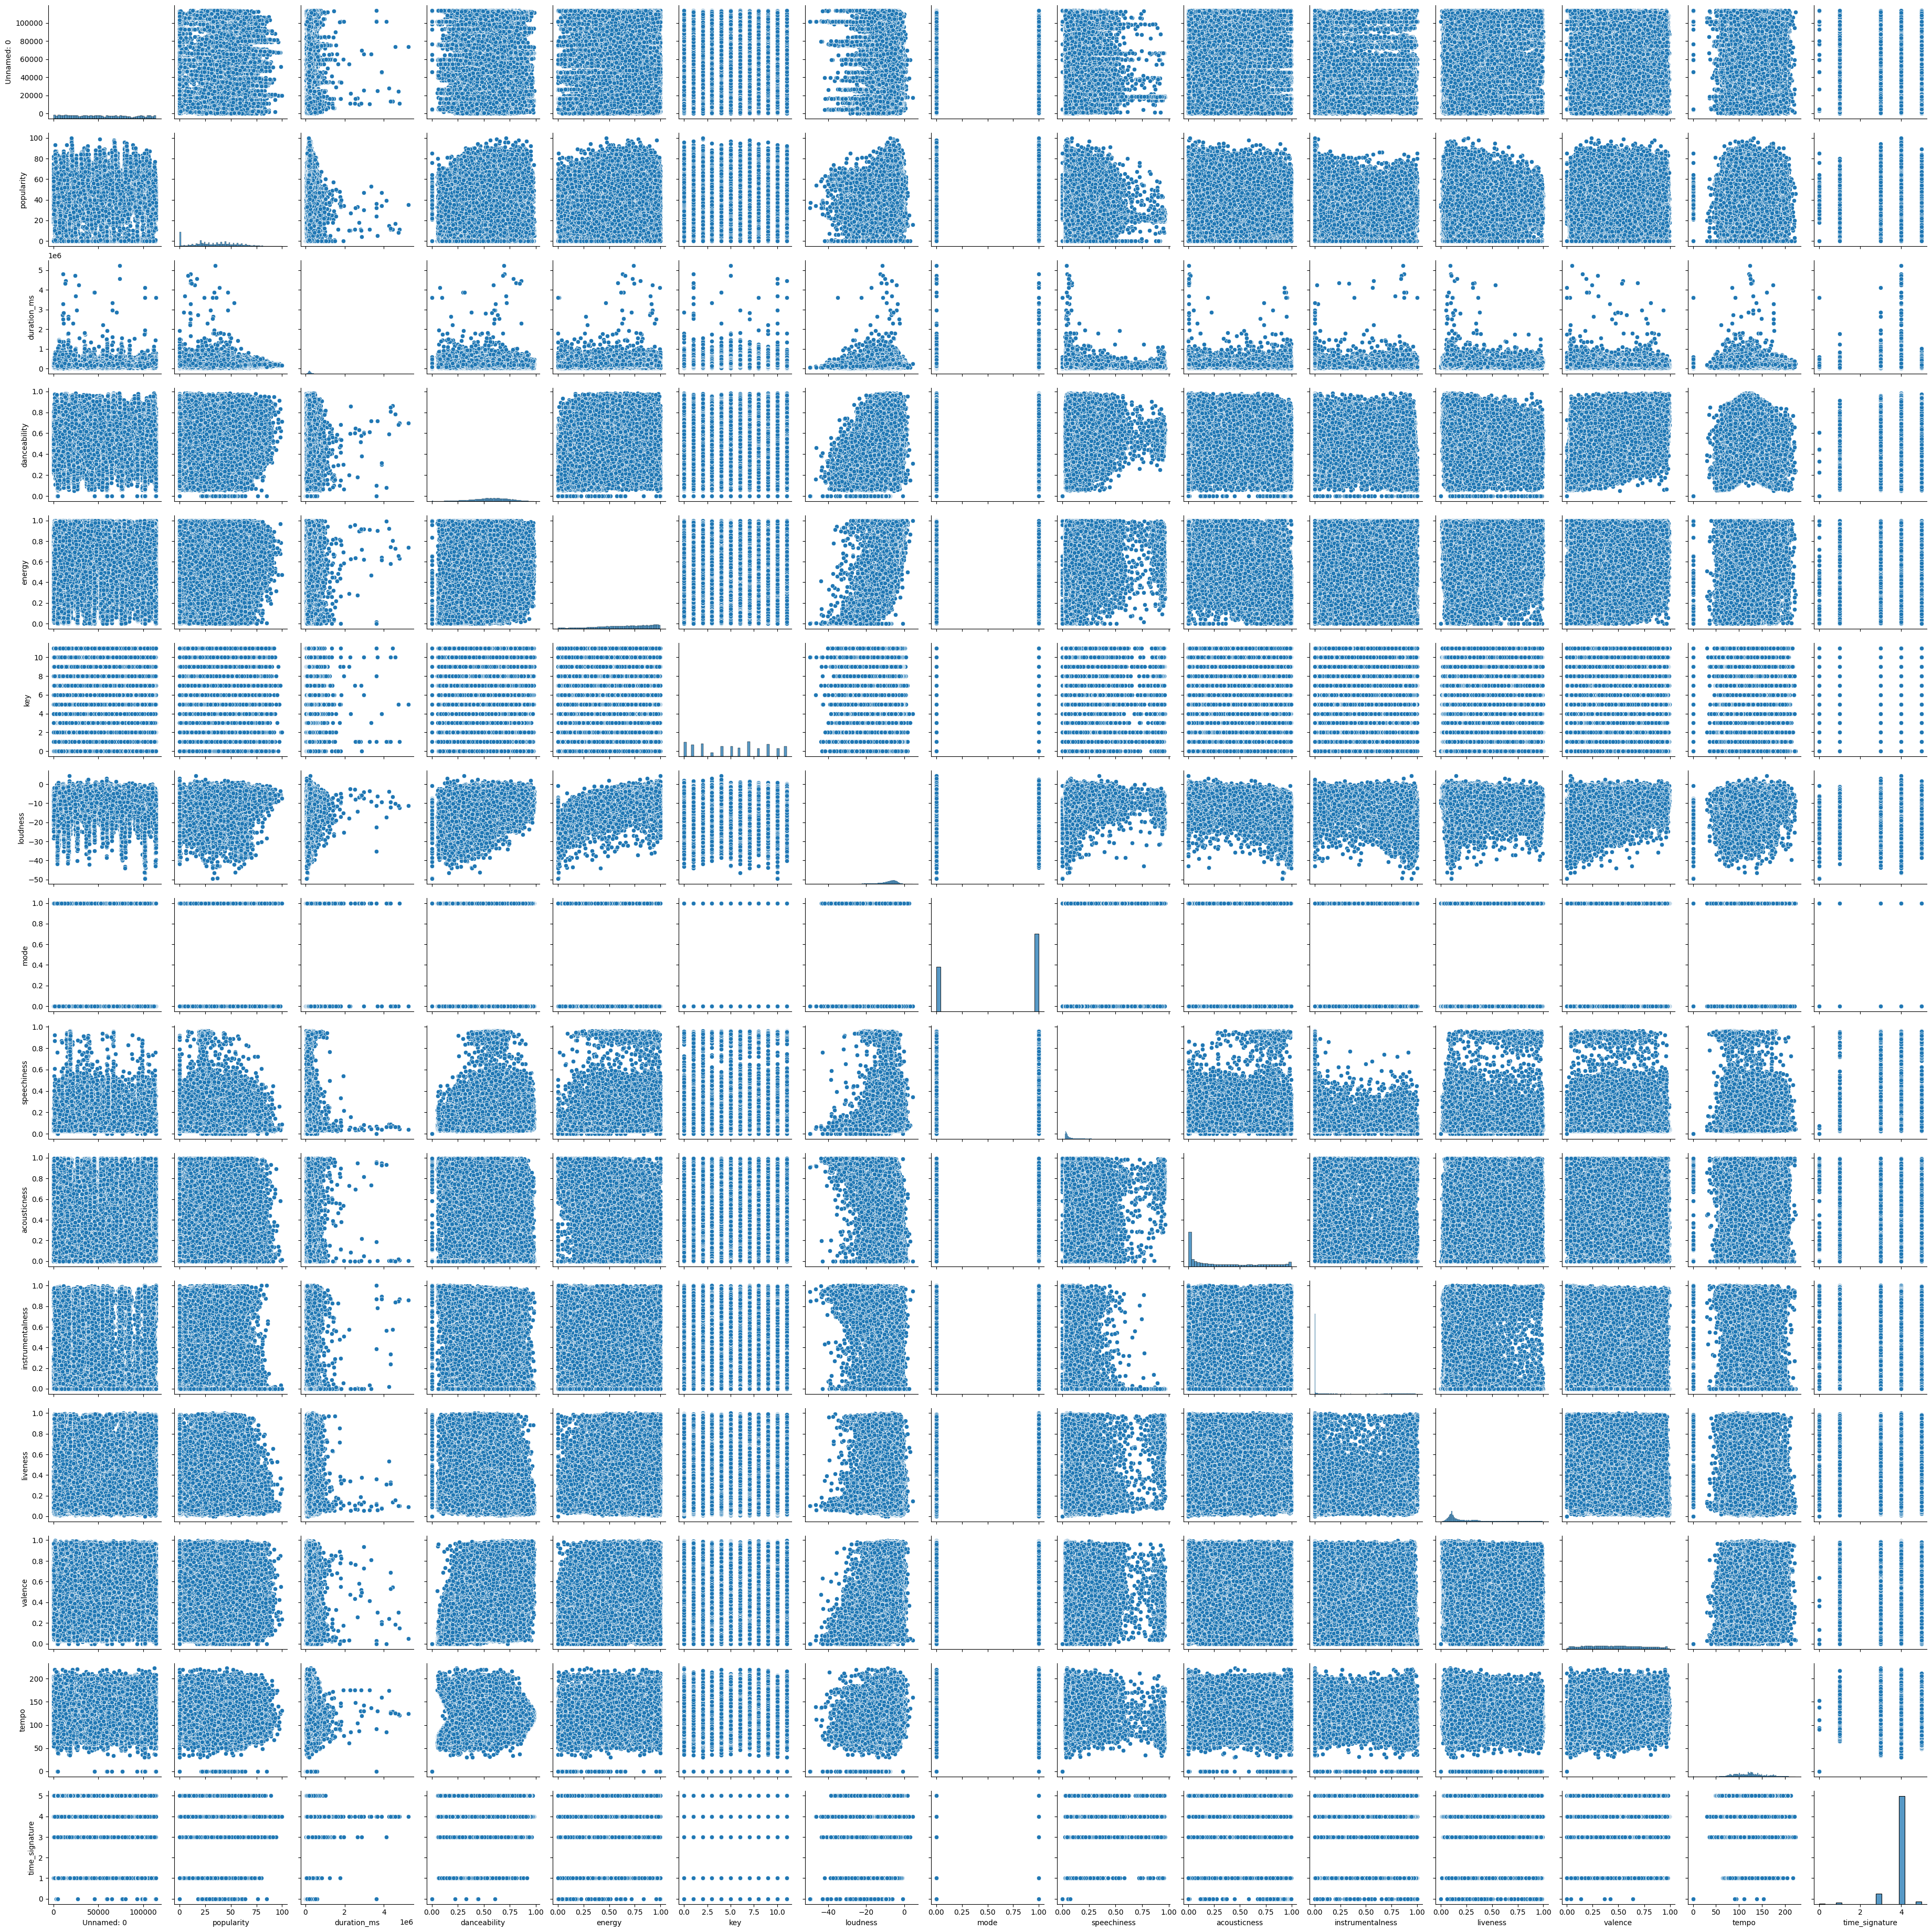

In [16]:
#Visualize scatterplot across all dependent variables
spotify_data_cleaned_dependent = spotify_data_cleaned.drop(columns = ["track_id", "artists","track_name", "track_genre", "explicit"])
sns.pairplot(data=spotify_data_cleaned_dependent)
plt.show()

In [17]:
# Select only numeric columns
spotify_data_cleaned_numeric = spotify_data_cleaned_dependent.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
Correlation_Matrix = spotify_data_cleaned_numeric.corr()

# Display the correlation matrix
print(Correlation_Matrix)

                  Unnamed: 0  popularity  duration_ms  danceability    energy  \
Unnamed: 0          1.000000    0.036347    -0.029055     -0.026001 -0.061720   
popularity          0.036347    1.000000    -0.023147      0.064284  0.013750   
duration_ms        -0.029055   -0.023147     1.000000     -0.064144  0.063246   
danceability       -0.026001    0.064284    -0.064144      1.000000  0.143905   
energy             -0.061720    0.013750     0.063246      0.143905  1.000000   
key                -0.009116    0.003458     0.011288      0.035109  0.046313   
loudness           -0.043405    0.071702     0.000345      0.271833  0.758765   
mode               -0.006219   -0.016220    -0.039389     -0.062648 -0.075046   
speechiness        -0.086857   -0.047083    -0.060753      0.109518  0.141329   
acousticness        0.086948   -0.038823    -0.108482     -0.177043 -0.732589   
instrumentalness   -0.048556   -0.127500     0.117386     -0.194744 -0.181015   
liveness            0.048406

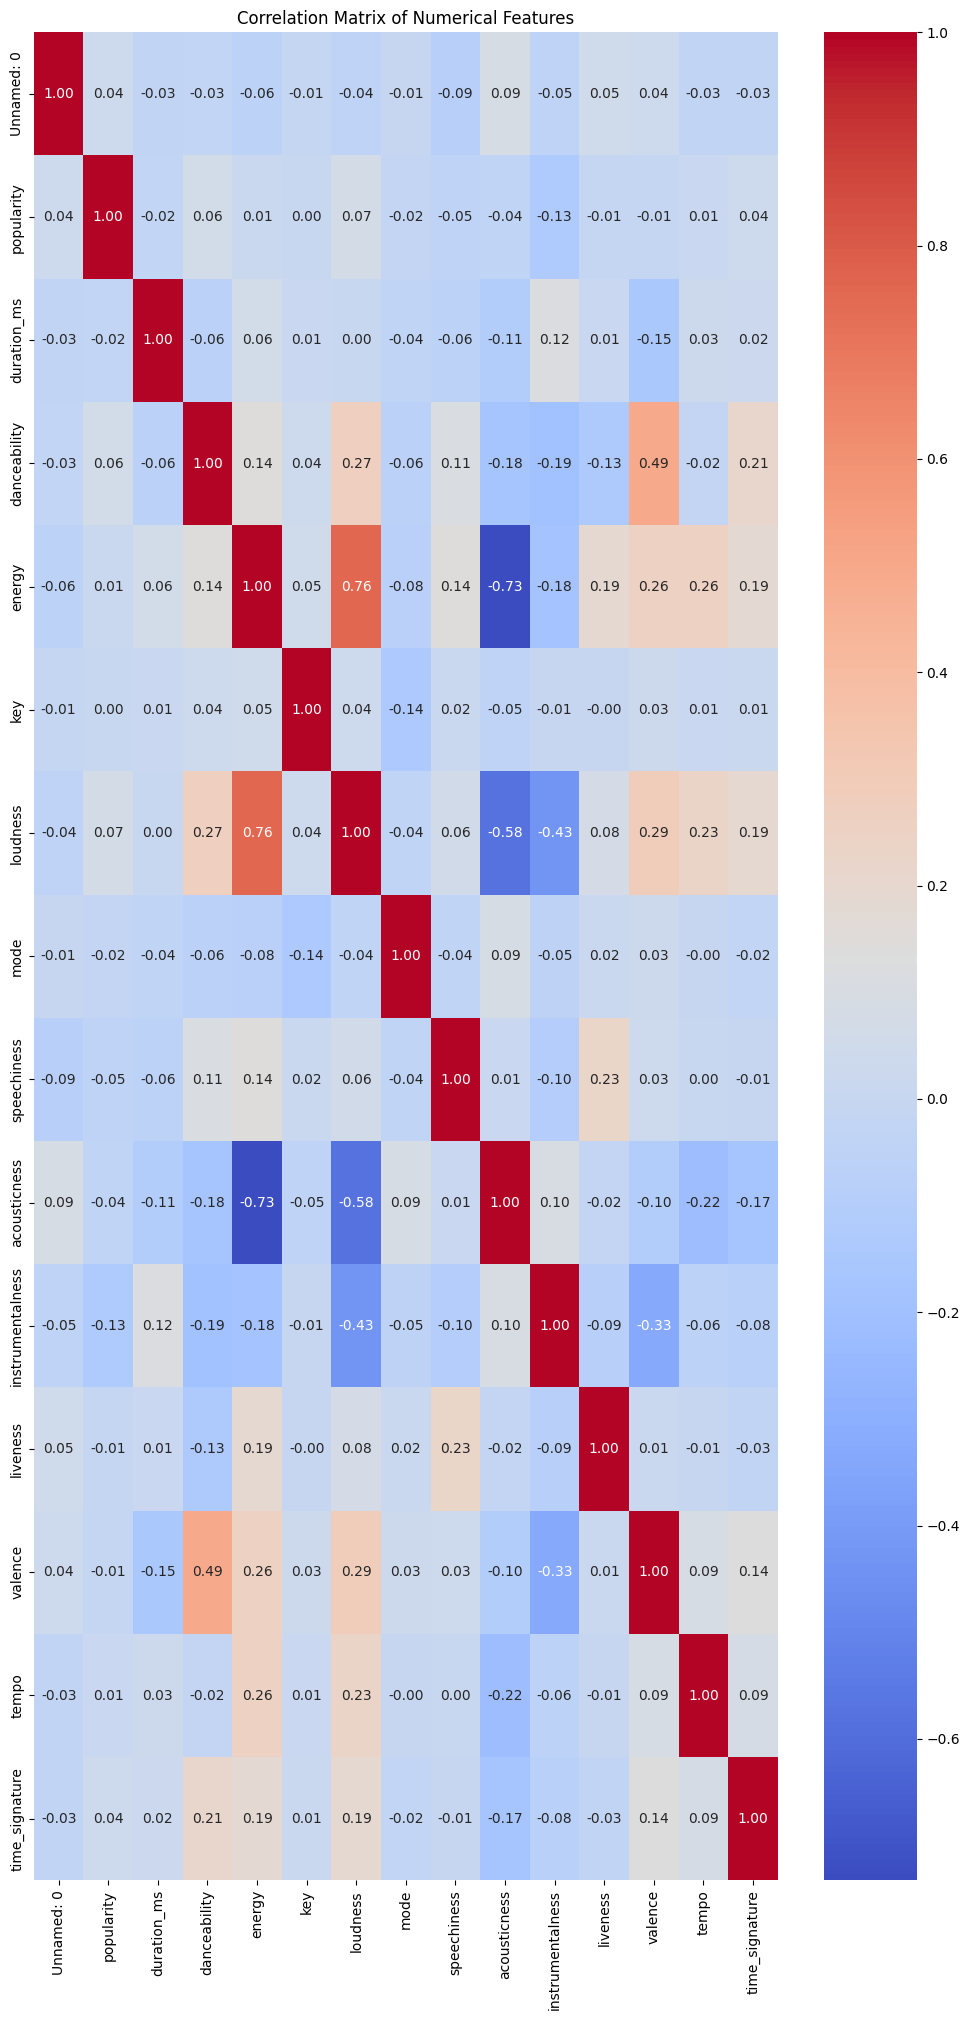

loudness            1.000000
energy              0.758765
valence             0.289113
danceability        0.271833
tempo               0.228770
time_signature      0.193662
liveness            0.077225
popularity          0.071702
speechiness         0.055290
key                 0.035879
duration_ms         0.000345
mode               -0.037139
Unnamed: 0         -0.043405
instrumentalness   -0.434701
acousticness       -0.582684
Name: loudness, dtype: float64
loudness            1.000000
energy              0.758765
valence             0.289113
danceability        0.271833
tempo               0.228770
time_signature      0.193662
liveness            0.077225
popularity          0.071702
speechiness         0.055290
key                 0.035879
duration_ms         0.000345
mode               -0.037139
Unnamed: 0         -0.043405
instrumentalness   -0.434701
acousticness       -0.582684
Name: loudness, dtype: float64


In [18]:
plt.figure(figsize=(12, 24))
sns.heatmap(Correlation_Matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Check specific correlations with 'popularity'
corr_with_popularity = Correlation_Matrix['loudness'].sort_values(ascending=False)

print(corr_with_popularity)
print(Correlation_Matrix['loudness'].sort_values(ascending=False))

# outliers - song duration
# boxplots

In [ ]:
# change this
X = []
# scale the predictors
X_std = (X - X.mean()) / X.std()
y = []

Perform Ridge Regression
Using 10-fold cross-validation to select the best lambda (alpha) value for the ridge regression model

In [ ]:
# note that the start/stop values in the first two arguments are the exponents
alphas = np.logspace(-1, 6, 100)

# create an empty list to store the cross-validation scores
ridge_cv_scores = []

# create a for loop to compute the cross-validation score for each alpha value
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge_cv = cross_validate(estimator=ridge,
                              X=X_std,
                              y=y,
                              cv=10,
                              scoring='neg_root_mean_squared_error')
    ridge_cv_scores.append({'alpha': alpha,
                            'log_alpha': np.log(alpha),
                            'test_mse': -np.mean(ridge_cv['test_score'])})

# convert the cross-validation scores into a data frame
ridge_cv_scores_df = pd.DataFrame(ridge_cv_scores)

# plot the cross-validation scores as a function of alpha
px.line(ridge_cv_scores_df,
        x='log_alpha',
        y='test_mse',
        title='Ridge')

Perform Lasso Regression
Using 10-fold cross-validation to select the best lambda (alpha) value for the lasso regression model

In [ ]:
# define the alpha values to test
alphas = np.logspace(-1, 4, 100)

# create an empty list to store the cross-validation scores
lasso_cv_scores = []

# create a for loop to compute the cross-validation score for each alpha value
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso_cv = cross_validate(estimator=lasso,
                              X=X_std,
                              y=y,
                              cv=10,
                              scoring='neg_root_mean_squared_error')
    lasso_cv_scores.append({'alpha': alpha,
                            'log_alpha': np.log(alpha),
                            'test_mse': -np.mean(lasso_cv['test_score'])})

# convert the cross-validation scores into a data frame
lasso_cv_scores_df = pd.DataFrame(lasso_cv_scores)

# plot the cross-validation scores as a function of alpha
px.line(lasso_cv_scores_df,
        x='log_alpha',
        y='test_mse',
        title='Lasso')

Get the best alpha values for each fit (ridge and lasso)

In [ ]:
# identify the value of alpha that minimizes the cross-validation score for ridge
ridge_alpha_min = ridge_cv_scores_df.sort_values(by='test_mse').head(1).alpha.values[0]
# compute the min MSE and the SE of the MSE
mse_se_ridge = ridge_cv_scores_df['test_mse'].std() / np.sqrt(10)
mse_min_ridge = ridge_cv_scores_df['test_mse'].min()


# identify the value of alpha that minimizes the cross-validation score for ridge within 1SE
ridge_alpha_1se = ridge_cv_scores_df[(ridge_cv_scores_df['test_mse'] <= mse_min_ridge + mse_se_ridge) &
                                     (ridge_cv_scores_df['test_mse'] >= mse_min_ridge - mse_se_ridge)].sort_values(by='alpha', ascending=False).head(1).alpha.values[0]


# identify the value of alpha that minimizes the cross-validation score for lasso
lasso_alpha_min = lasso_cv_scores_df.sort_values(by='test_mse').head(1).alpha.values[0]
# compute the min MSE and the SE of the MSE
mse_se_lasso = lasso_cv_scores_df['test_mse'].std() / np.sqrt(10)
mse_min_lasso = lasso_cv_scores_df['test_mse'].min()

# identify the value of alpha that minimizes the cross-validation score for lasso within 1SE
lasso_alpha_1se = lasso_cv_scores_df[(lasso_cv_scores_df['test_mse'] <= mse_min_lasso + mse_se_lasso) &
                                     (lasso_cv_scores_df['test_mse'] >= mse_min_lasso - mse_se_lasso)].sort_values(by='alpha', ascending=False).head(1).alpha.values[0]


In [ ]:
print('Ridge (min): ', ridge_alpha_min)
print('Ridge (1SE): ', ridge_alpha_1se)
print('Lasso (min): ', lasso_alpha_min)
print('Lasso (1SE): ', lasso_alpha_1se)

Fit the ridge and lasso models

In [ ]:
# use ridge_alpha_min to fit the ridge regression model
ridge_min_fit = Ridge(alpha=ridge_alpha_min).fit(X=X_std, y=y)
ridge_1se_fit = Ridge(alpha=ridge_alpha_1se).fit(X=X_std, y=y)

# use lasso_alpha_min to fit the lasso regression model
lasso_min_fit = Lasso(alpha=lasso_alpha_min).fit(X=X_std, y=y)
lasso_1se_fit = Lasso(alpha=lasso_alpha_1se).fit(X=X_std, y=y)